In [ ]:
!nvidia-smi

Thu Jun 10 07:02:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install opacus

     |████████████████████████████████| 102kB 4.5MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
!pip install syft==0.2.9

     |████████████████████████████████| 440kB 4.3MB/s 
     |████████████████████████████████| 1.8MB 26.4MB/s 
     |████████████████████████████████| 4.0MB 50.7MB/s 
     |████████████████████████████████| 753.4MB 23kB/s 
     |████████████████████████████████| 20.1MB 1.3MB/s 
     |████████████████████████████████| 81kB 12.9MB/s 
     |████████████████████████████████| 450kB 52.0MB/s 
     |████████████████████████████████| 61kB 11.0MB/s 
     |████████████████████████████████| 61kB 10.9MB/s 
     |████████████████████████████████| 81kB 13.0MB/s 
     |████████████████████████████████| 491kB 54.2MB/s 
     |████████████████████████████████| 71kB 11.1MB/s 
     |████████████████████████████████| 133kB 56.8MB/s 
     |████████████████████████████████| 9.0MB 16.9MB/s 
     |████████████████████████████████| 2.0MB 43.8MB/s 
     |████████████████████████████████| 204kB 52.5MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 61kB 10.6MB/s 
 

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
import pandas as pd 
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

%load_ext tensorboard
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import copy
import random
import time

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, Dataset

from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms, utils, datasets
from torchsummary import summary
from torch.autograd import Variable


from tqdm import tqdm


# Check assigned GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

# set manual seed for reproducibility
seed = 42

# general reproducibility
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# gpu training specific
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Thu Jun 10 07:05:47 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive

drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [ ]:
!gsutil cp -r "/gdrive/My Drive/MNIST3.zip" "../MNIST3.zip"

Copying file:///gdrive/My Drive/MNIST3.zip...
-
Operation completed over 1 objects/27.5 MiB.                                     


In [ ]:
!unzip "../MNIST3.zip" -d "../"

Streaming output truncated to the last 5000 lines.
 extracting: ../MNIST3/test/6/54.png  
 extracting: ../MNIST3/test/6/7074.png  
 extracting: ../MNIST3/test/6/8504.png  
 extracting: ../MNIST3/test/6/3557.png  
 extracting: ../MNIST3/test/6/8374.png  
 extracting: ../MNIST3/test/6/4129.png  
 extracting: ../MNIST3/test/6/1448.png  
  inflating: ../MNIST3/test/6/4148.png  
 extracting: ../MNIST3/test/6/8738.png  
 extracting: ../MNIST3/test/6/4451.png  
 extracting: ../MNIST3/test/6/6920.png  
 extracting: ../MNIST3/test/6/1804.png  
 extracting: ../MNIST3/test/6/6033.png  
 extracting: ../MNIST3/test/6/360.png  
 extracting: ../MNIST3/test/6/3461.png  
 extracting: ../MNIST3/test/6/7279.png  
 extracting: ../MNIST3/test/6/7493.png  
 extracting: ../MNIST3/test/6/3102.png  
 extracting: ../MNIST3/test/6/9016.png  
 extracting: ../MNIST3/test/6/8289.png  
 extracting: ../MNIST3/test/6/317.png  
 extracting: ../MNIST3/test/6/2487.png  
 extracting: ../MNIST3/test/6/4247.png  
 extractin

In [ ]:
!gsutil cp "/gdrive/My Drive/MNIST_train.csv" "../MNIST3_train.csv"
!gsutil cp "/gdrive/My Drive/MNIST_test.csv" "../MNIST3_test.csv"

CommandException: No URLs matched: /gdrive/My Drive/MNIST_train.csv
CommandException: No URLs matched: /gdrive/My Drive/MNIST_test.csv


In [ ]:
!ls "../"

bin	 dev	 lib	MNIST3	    proc  srv		     tools
boot	 etc	 lib32	MNIST3.zip  root  sys		     usr
content  gdrive  lib64	mnt	    run   tensorflow-1.15.2  var
datalab  home	 media	opt	    sbin  tmp


# PREPROCESS

In [ ]:
new_dict = {}

In [ ]:
l = ["Paths", "Labels"]

In [ ]:
new_dict = dict(zip(new_dict, l))
new_dict

{}

In [ ]:
new_dict.update(dict(zip(new_dict, l)))
new_dict

{}

In [ ]:
pathlist = []
label = []

for file in os.listdir("../MNIST3/train/"):
  for n in os.listdir("../MNIST3/train/"+file):
    pathlist.append("../MNIST3/train/"+file+"/"+n)
    label.append(int(file))    

In [ ]:
len(label)

54649

In [ ]:
len(pathlist)

54649

In [ ]:
data = {
   'Paths': [],
   'Labels': []
}
df = pd.DataFrame(data)

df['Paths'] = pathlist
df['Labels'] = label

df.head(5)

,Paths,Labels
0,../MNIST3/train/4/30474.png,4
1,../MNIST3/train/4/46801.png,4
2,../MNIST3/train/4/20978.png,4
3,../MNIST3/train/4/45679.png,4
4,../MNIST3/train/4/37749.png,4


In [ ]:
len(df)

54649

In [ ]:
from google.colab import files

df.to_csv('../gdrive/My Drive/MNIST3_train.csv')
df.to_csv('../MNIST3_train.csv')
#files.download('../gdrive/My Drive/.csv')

In [ ]:
new_dict = {}

In [ ]:
l = ["Paths", "Labels"]

In [ ]:
new_dict = dict(zip(new_dict, l))
new_dict

{}

In [ ]:
new_dict.update(dict(zip(new_dict, l)))
new_dict

{}

In [ ]:
pathlist = []
label = []

for file in os.listdir("../MNIST3/test/"):
  for n in os.listdir("../MNIST3/test/"+file):
    pathlist.append("../MNIST3/test/"+file+"/"+n)
    label.append(int(file))    

In [ ]:
len(label)

9109

In [ ]:
len(pathlist)

9109

In [ ]:
data = {
   'Paths': [],
   'Labels': []
}
df = pd.DataFrame(data)

df['Paths'] = pathlist
df['Labels'] = label

df.head(5)

,Paths,Labels
0,../MNIST3/test/4/7511.png,4
1,../MNIST3/test/4/7590.png,4
2,../MNIST3/test/4/7826.png,4
3,../MNIST3/test/4/6542.png,4
4,../MNIST3/test/4/7687.png,4


In [ ]:
len(df)

9109

In [ ]:
from google.colab import files

df.to_csv('../gdrive/My Drive/MNIST3_test.csv')
df.to_csv('../MNIST3_test.csv')
#files.download('../gdrive/My Drive/.csv')

# START

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Model(nn.Module):
    """Class used to initialize model of student/teacher"""

    def __init__(self):

        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):

        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import opacus 
from opacus import PrivacyEngine

class Student:
    """Implementation of Student models
       The student model is trained from the public data labelled by teacher ensembles.
       The teacher ensembles were trained using sensitive data. The student model is further
       used to make predictions on public data.
       Args:
           args[Arguments obj]: Object of arguments class used to control hyperparameters
           model[torch model]: Model of Student 
    """

    def __init__(self, args, model):

        self.args = args
        self.model = model

    def predict(self, data):
        """Function which accepts unlabelled public data and labels it using 
           teacher's model.
           Args:
               model[torch model]: Teachers model
               data [torch tensor]: Public unlabelled data
           Returns:
               dataset[Torch tensor]: Labelled public dataset
        """

        return torch.max(self.model(data), 1)[1]

    def train(self, dataset):
        """Function to train the student model.
           Args:
               dataset[torch dataset]: Dataset using which model is trained.
        """

        for epoch in range(0, self.args.student_epochs):
            self.loop_body(dataset, epoch)

    def loop_body(self, dataset, epoch):
        """Body of the training loop.
           Args:
               dataset: dataset which is used to train the model.
               epoch: Epoch for which the model is being trained.
        """

        optimizer = optim.SGD(self.model.parameters(), lr=self.args.lr, momentum=self.args.momentum)
        iters = 0
        loss = 0.0
        batch_size = sample_size = 32
        
        # if epoch == 1:
        #   privacy_engine = PrivacyEngine(
        #       model,
        #       batch_size = batch_size,
        #       sample_size = sample_size,
        #       alphas=[10, 100],
        #       noise_multiplier= 12,
        #       max_grad_norm = 1.0,
        #       target_delta = 1e-22,
        #   )
        #   privacy_engine.attach(optimizer)
        self.model = self.model.cuda()
        for (data, target) in dataset:
            data,target=data.cuda(),target.cuda()
            optimizer.zero_grad()
            output = self.model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()
            iters += 1
        # Print loss by making using of log intervals
        print("\n")
        print("EPOCH")
        print(epoch)
        print("\n")
        print("Loss")
        print(loss.item())

    def save_model(self):
        torch.save(self.model.state_dict(), "Models/" + "student_model")

In [ ]:
def split(dataset, batch_size, split=0.2):
    """Splits the given dataset into training/validation.
       Args:
           dataset[torch dataloader]: Dataset which has to be split
           batch_size[int]: Batch size
           split[float]: Indicates ratio of validation samples
       Returns:
           train_set[list]: Training set
           val_set[list]: Validation set
    """

    index = 0
    length = len(dataset)

    train_set = []
    val_set = []

    for data, target in dataset:
        if index <= (length * split):
            train_set.append([data, target])
        else:
            val_set.append([data, target])

        index += 1

    return train_set, val_set


def accuracy(predictions, dataset):
    """Evaluates accuracy for given set of predictions and true labels.
       Args:
           predictions[torch tensor]: predictions made by classifier.
           labels[torch tensor]: true labels of the dataset.
       Returns:
           accuracy[float]: accuracy of classifier.
    """

    total = 0.0
    correct = 0.0

    for j in range(0, len(dataset)):
        correct += (predictions[j].cpu().long() == dataset[j].cpu().long()).sum().item()
        total += len(dataset[j])

    return (correct / total) * 100


def plot(x, y):
    """Plots a graph of given x and y.
       Args:
           
           x:
           y:
    """
    pass


def histogram(x, y):
    """Plots a histogram for corresponding x and y:
       Args:
           
           x:
           y:
    """

In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions.laplace import Laplace
#from util import accuracy
from syft.frameworks.torch.dp import pate

class Teacher:
    """Implementation of teacher models.
       Teacher models are ensemble of models which learns directly disjoint splits of the sensitive data
       The ensemble of teachers are further used to label unlabelled public data on which the student is 
       trained. 
       Args:
           args[Arguments object]: An object of Arguments class with required hyperparameters
           n_teachers[int]: Number of teachers
           epochs[int]: Number of epochs to train each model
    """

    def __init__(self, args, model, n_teachers=1, epsilon=0.5):

        self.n_teachers = n_teachers
        self.model = model
        self.models = {}
        self.args = args
        self.init_models()
        self.epsilon = epsilon

    def init_models(self):
        """Initialize teacher models according to number of required teachers"""

        name = "model_"
        for index in range(0, self.n_teachers):

            model = self.model()
            self.models[name + str(index)] = model

    def addnoise(self, x):
        """Adds Laplacian noise to histogram of counts
           Args:
                counts[torch tensor]: Histogram counts
                epsilon[integer]:Amount of Noise
           Returns:
                counts[torch tensor]: Noisy histogram of counts
        """

        m = Laplace(torch.tensor([0.0]), torch.tensor([self.epsilon]))
        count = x + m.sample()

        return count

    def split(self, dataset):
        """Function to split the dataset into non-overlapping subsets of the data
           Args:
               dataset[torch tensor]: The dataset in the form of (image,label)
           Returns:
               split: Split of dataset
        """

        ratio = int(len(dataset) / self.n_teachers)
        iters = 0
        index = 0
        split = []
        last_batch = ratio * self.n_teachers

        for teacher in range(0, self.n_teachers):

            split.append([])

        for (data, target) in dataset:
            if (iters) % ratio == 0 and iters != 0:

                index += 1

            split[index].append([data, target])
            iters += 1

            if iters == last_batch:
                return split

        return split

    def train(self, dataset):
        """Function to train all teacher models.
           Args:
                dataset[torch tensor]: Dataset used to train teachers in format (image,label)
        """

        split = self.split(dataset)
        print(self.args.epochs)
        for epoch in range(1, self.args.epochs + 1):

            index = 0
            for model_name in self.models:

                # print("TRAINING ", model_name)
                # print("EPOCH: ", epoch)
                self.loop_body(split[index], model_name, epoch)
                index += 1

    def loop_body(self, split, model_name, epoch):
        """Body of the training loop.
           Args:
               split: Split of the dataset which the model has to train.
               model_name: Name of the model.
               epoch: Epoch for which the model is being trained.
        """
        model = self.models[model_name].cuda()
        optimizer = optim.SGD(model.parameters(), lr=self.args.lr, momentum=self.args.momentum)
        iters = 0
        loss = 0.0
        for (data, target) in split:
            data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()
            iters += 1
        # Print loss by making using of log intervals
        # print("Loss")
        # print(loss.item())

    def aggregate(self, model_votes, batch_size):
        """Aggregate model output into a single tensor of votes of all models.
           Args:
                votes: Model output
                n_dataset: Number of datapoints
           Returns:
                counts: Torch tensor with counts across all models    
           """

        counts = torch.zeros([batch_size, 10])
        model_counts = torch.zeros([self.args.n_teachers, batch_size])
        model_index = 0

        for model in model_votes:

            index = 0

            for tensor in model_votes[model]:
                for val in tensor:

                    counts[index][val] += 1
                    model_counts[model_index][index] = val
                    index += 1

            model_index += 1

        return counts, model_counts

    def save_models(self):
        no = 0
        for model in self.models:

            torch.save(self.models[model].state_dict(), "models/" + model)
            no += 1

        print("\n")
        print("MODELS SAVED")
        print("\n")

    def load_models(self):

        path_name = "model_"

        for i in range(0, self.args.n_teachers):

            modelA = self.model()
            self.models[path_name + str(i)] = torch.load("models/" + path_name + str(i))
            self.models[path_name + str(i)] = modelA.load_state_dict()

    def analyze(self, preds, indices, moments=8):

        datadepeps, dataindeps = pate.perform_analysis_torch(
            preds, indices, noise_eps = 0.5 * 1e-2, delta= 1e-5, moments=moments, beta=0.09
        ) # increase noise_eps and fix delta
        return datadepeps, dataindeps

    def predict(self, data):
        """Make predictions using Noisy-max using Laplace mechanism.
           Args:
                data: Data for which predictions are to be made
           Returns:
                predictions: Predictions for the data
        """

        model_predictions = {}

        for model in self.models:
            self.models[model] = self.models[model].cuda()
            out = []
            output = self.models[model](data)
            output = output.max(dim=1)[1]
            out.append(output)

            model_predictions[model] = out

        counts, model_counts = self.aggregate(model_predictions, len(data))
        counts = counts.apply_(self.addnoise)

        predictions = []

        for batch in counts:

            predictions.append(torch.tensor(batch.max(dim=0)[1].long()).clone().detach())

        output = {"predictions": predictions, "counts": counts, "model_counts": model_counts}

        return output

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
import os

def load_data(train, batch_size):
    """Helper function used to load the train/test data.
       Args:
           train[boolean]: Indicates whether its train/test data.
           batch_size[int]: Batch size
    """

    dataset_mnist = datasets.MNIST(
            "../data",
            train=train,
            download=True,
            transform=transforms.Compose(
                [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
            ),
        )
    classes, class_counts = np.unique(dataset_mnist.targets, return_counts=True)
    nb_classes = len(classes)
    if train == True:
      # imbal_class_counts = [6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 500, 6000]

      # # Get class indices
      # class_indices = [np.where(np.array(dataset_mnist.targets) == i)[0] for i in range(nb_classes)]

      # # Get imbalanced number of instances
      # imbal_class_indices = [class_idx[:class_count] for class_idx, class_count in zip(class_indices, imbal_class_counts)]
      # imbal_class_indices = np.hstack(imbal_class_indices)
      # #print(type(imbal_class_indices))
      # #print(imbal_class_indices[0:2])


      # # Set target and data to dataset
      # dataset_mnist.targets = np.array(dataset_mnist.targets)[imbal_class_indices]
      # dataset_mnist.data = dataset_mnist.data[imbal_class_indices]


      data_dir = '/content/drive/My Drive/MNIST'

      dataset_mnist = []

      for label in os.listdir(data_dir):
        for img in os.listdir(os.path.join(data_dir, label)):
          dataset_mnist.append((img, label))

    loader = torch.utils.data.DataLoader(
        dataset_mnist,
        batch_size=batch_size,
        shuffle=True,
    )

    return loader


class NoisyDataset(Dataset):
    """Dataset with targets predicted by ensemble of teachers.
       Args:
            dataloader (torch dataloader): The original torch dataloader.
            model(torch model): Teacher model to make predictions.
            transform (callable, optional): Optional transform to be applied on a sample.
    """

    def __init__(self, dataloader, predictionfn, transform=None):
        self.dataloader = dataloader
        self.predictionfn = predictionfn
        self.transform = transform
        self.noisy_data = self.process_data()

    def process_data(self):
        """
        Replaces original targets with targets predicted by ensemble of teachers.
        Returns:
            noisy_data[torch tensor]: Dataset with labels predicted by teachers
            
        """

        noisy_data = []

        for data, _ in self.dataloader:
            data=data.cuda()
            noisy_data.append([data, torch.tensor(self.predictionfn(data)["predictions"])])

        return noisy_data

    def __len__(self):
        return len(self.dataloader)

    def __getitem__(self, idx):

        sample = self.noisy_data[idx]

        if self.transform:
            sample = self.transform(sample)

        return sample

In [ ]:
# # len(test_loader.dataset.data)
# import matplotlib.pyplot as plt

# train_loader = load_data(True, 32)


# for (label, img) in train_loader:
#   print(label)
#   plt.imshow(img)
#   plt.show()

In [ ]:
from PIL import Image

In [ ]:
class CustomDatasetFromCsvData(Dataset):
    def __init__(self, csv_path, transform=None):
        """
        Custom dataset example for reading data from csv
        Args:
            csv_path (string): path to csv file
            height (int): image height
            width (int): image width
            transform: pytorch transforms for transforms and tensor conversion
        """
        self.data = pd.read_csv(csv_path)
        self.paths = self.data['Paths']
        self.labels = np.asarray(self.data['Labels'])
        #self.height = height
        #self.width = width
        self.transform = transform

    def __getitem__(self, index):
        single_image_label = self.labels[index]
        # Read each 784 pixels and reshape the 1D array ([784]) to 2D array ([28,28])
        img_as_np = Image.open(self.paths[index])
        img_as_np = np.reshape(img_as_np, (28,28))
        #img_as_np = np.asarray(self.data.iloc[index][1:]).reshape(28, 28).astype('uint8')
        # Convert image from numpy array to PIL image, mode 'L' is for grayscale
        img_as_img = Image.fromarray(img_as_np)
        #img_as_img = img_as_img.convert('L')
        # Transform image to tensor
        if self.transform is not None:
            img_as_tensor = self.transform(img_as_img)
        #img_as_tensor = Variable(img_as_tensor)
        #single_image_label = Variable(torch.Tensor(single_image_label))
        # Return image and the label
        return (img_as_tensor, single_image_label)

    def __len__(self):
        return len(self.data.index)

In [ ]:
#train_loader = DataLoader(CustomDataset('../gdrive/My Drive/MNIST/'), batch_size=32, shuffle=True)

transformations_train = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

transformations_test = transforms.Compose([transforms.Resize((28, 28)), transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

mnist_train_data = CustomDatasetFromCsvData('../MNIST3_train.csv', transformations_train)

In [ ]:
mnist_test_data = CustomDatasetFromCsvData('../MNIST3_test.csv', transformations_test)

In [ ]:
# Required imports
import torch
#from Teacher import Teacher
#from Model import Model
#from data import load_data, NoisyDataset
#from util import accuracy, split
#from Student import Student
import syft as sy
from syft.frameworks.torch.dp import pate
from sklearn.metrics import confusion_matrix


class Arguments:

    # Class used to set hyperparameters for the whole PATE implementation
    def __init__(self):

        self.batchsize = 32
        self.test_batchsize = 10
        self.epochs = 50
        self.student_epochs = 30
        self.lr = 0.01
        self.momentum = 0.5
        self.no_cuda = False
        self.seed = 1
        self.log_interval = 30
        self.n_teachers = 1
        self.save_model = False


args = Arguments()

class_accuracies = []
#train_loader = load_data(True, args.batchsize)
#test_loader = load_data(False, args.test_batchsize)

for i in range(5):
  train_loader = torch.utils.data.DataLoader(dataset=mnist_train_data, batch_size=args.batchsize, shuffle=True, drop_last = True)
  test_loader = torch.utils.data.DataLoader(dataset=mnist_test_data, batch_size=args.test_batchsize, shuffle=True, drop_last = True)


  # Declare and train teachers on MNIST training data
  teacher = Teacher(args, Model, n_teachers=args.n_teachers)
  teacher.train(train_loader)

  # Evaluate Teacher accuracy
  teacher_targets = []
  predict = []

  counts = []
  original_targets = []

  print(f'Iteration {i}\n\n')
  for data, target in test_loader:
      data, target = data.cuda(), target.cuda()

      output = teacher.predict(data)

      arr_target = []
      teacher_targets.append(target)
      original_targets.append(target)
      predict.append(output["predictions"])
      counts.append(output["model_counts"])
      print("Accuracy: ", accuracy(torch.tensor(predict), teacher_targets))

  print("Accuracy: ", accuracy(torch.tensor(predict), teacher_targets))

  print("\n")
  print("\n")

  print("Training Student")

  print("\n")
  print("\n")

  # Split the test data further into training and validation data for student
  train, val = split(test_loader, args.batchsize)

  student = Student(args, Model())
  N = NoisyDataset(train, teacher.predict)
  student.train(N)

  results = []
  targets = []

  total = 0.0
  correct = 0.0

  for data, target in val:
      data, target = data.cuda(), target.cuda()
      predict_lol1 = student.predict(data)
      correct += float((predict_lol1 == (target)).sum().item())
      total += float(target.size(0))

  print("Private Baseline: ", (correct / total) * 100)

  counts_lol = torch.stack(counts).contiguous()
  counts_lol = counts_lol.view(1, 9100)
  predict_lol = torch.tensor(predict).view(9100)

  data_dep_eps, data_ind_eps = teacher.analyze(counts_lol, predict_lol, moments= 20)
  print(f"Dependent Epsilon: {data_dep_eps}\nIndependent Epsilon: {data_ind_eps}")

  targets_1 = []
  predict_1 = []

  for data, target in val:
    data, target = data.cuda(), target.cuda()
    predict_1.append(student.predict(data))
    targets_1.append(target)

  ### Class-Wise Accuracy of the predictions on the base model

  for i in range(len(targets_1)):
    targets_1[i] = targets_1[i].cpu()
    predict_1[i] = predict_1[i].cpu()


  conf_mat=confusion_matrix(np.concatenate(targets_1), np.concatenate(predict_1))
  print(conf_mat)
  class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)
  print(class_accuracy)
  class_accuracies.append(class_accuracy)

50
Iteration 0


Accuracy:  60.0
Accuracy:  60.0
Accuracy:  53.333333333333336
Accuracy:  55.00000000000001
Accuracy:  54.0
Accuracy:  53.333333333333336
Accuracy:  54.285714285714285
Accuracy:  53.75
Accuracy:  53.333333333333336
Accuracy:  50.0
Accuracy:  50.90909090909091
Accuracy:  49.166666666666664
Accuracy:  49.23076923076923
Accuracy:  48.57142857142857
Accuracy:  48.0
Accuracy:  50.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Accuracy:  51.17647058823529
Accuracy:  50.0
Accuracy:  48.94736842105264
Accuracy:  50.0
Accuracy:  49.523809523809526
Accuracy:  49.09090909090909
Accuracy:  50.0
Accuracy:  48.75
Accuracy:  49.2
Accuracy:  49.23076923076923
Accuracy:  49.629629629629626
Accuracy:  49.28571428571429
Accuracy:  48.62068965517241
Accuracy:  49.0
Accuracy:  49.354838709677416
Accuracy:  49.375
Accuracy:  49.696969696969695
Accuracy:  50.0
Accuracy:  50.0
Accuracy:  49.72222222222222
Accuracy:  49.18918918918919
Accuracy:  49.473684210526315
Accuracy:  49.23076923076923
Accuracy:  49.0
Accuracy:  48.536585365853654
Accuracy:  48.80952380952381
Accuracy:  49.30232558139535
Accuracy:  49.31818181818181
Accuracy:  49.77777777777778
Accuracy:  49.56521739130435
Accuracy:  49.148936170212764
Accuracy:  49.166666666666664
Accuracy:  48.775510204081634
Accuracy:  49.2
Accuracy:  49.411764705882355
Accuracy:  49.80769230769231
Accuracy:  50.0
Accuracy:  50.0
Accuracy:  50.18181818181818
Accuracy:  50.17857142857

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).




EPOCH
0


Loss
2.048402786254883


EPOCH
1


Loss
1.93850839138031


EPOCH
2


Loss
1.9178797006607056


EPOCH
3


Loss
1.8886620998382568


EPOCH
4


Loss
1.8729242086410522


EPOCH
5


Loss
1.851541519165039


EPOCH
6


Loss
1.8371851444244385


EPOCH
7


Loss
1.8216664791107178


EPOCH
8


Loss
1.7863727807998657


EPOCH
9


Loss
1.734459638595581


EPOCH
10


Loss
1.6880937814712524


EPOCH
11


Loss
1.6167800426483154


EPOCH
12


Loss
1.5532199144363403


EPOCH
13


Loss
1.4670684337615967


EPOCH
14


Loss
1.4292166233062744


EPOCH
15


Loss
1.400372862815857


EPOCH
16


Loss
1.4467155933380127


EPOCH
17


Loss
1.340631127357483


EPOCH
18


Loss
1.1390330791473389


EPOCH
19


Loss
0.9776301383972168


EPOCH
20


Loss
0.7473675012588501


EPOCH
21


Loss
0.6636217832565308


EPOCH
22


Loss
0.7827767133712769


EPOCH
23


Loss
0.7280973792076111


EPOCH
24


Loss
0.5341902375221252


EPOCH
25


Loss
0.6302667260169983


EPOCH
26


Loss
0.41488441824913025


EPOCH
27


Loss

In [ ]:
print(counts_lol.shape)

torch.Size([910, 1, 10])


Dependent Epsilon: 5.0327253341674805
Independent Epsilon: 5.0325846672058105
[[361  80  15  24  63  28 152  22   9  32]
 [ 19 549  55  13  75  13  42  17 106   0]
 [ 38  34 515  11  31  47  32  24  28  40]
 [ 22  19  46 524  17  13  14  16 104  33]
 [ 41   9  78  64 413  30  42  29  35  53]
 [ 60 122  82  64  54 209  38   1  54  32]
 [ 44  17  25  27  31   9 450  38 114  12]
 [ 30  60  24  13  10  13 170 489  13  10]
 [  4   1   5   4   2   4   7   6  20  10]
 [ 11  55 124  35  36  74  45  49  15 371]]
[45.92875318 61.75478065 64.375      64.85148515 52.01511335 29.18994413
 58.67014342 58.77403846 31.74603175 45.52147239]


In [ ]:
# counts_lol = torch.stack(counts).contiguous()
# # print(counts_lol.shape)
# counts_lol = counts_lol.view(50, 9100)
# predict_lol = torch.tensor(predict).view(9100)

# data_dep_eps, data_ind_eps = teacher.analyze(counts_lol, predict_lol, moments= 20)
# print(f"Dependent Epsilon: {data_dep_eps}\nIndependent Epsilon: {data_ind_eps}")

In [ ]:
# # Evaluate Teacher accuracy
# teacher_targets = []
# predict = []

# counts = []
# original_targets = []


# for data, target in test_loader:

#     output = teacher.predict(data)

#     arr_target = []
#     teacher_targets.append(target)
#     original_targets.append(target)
#     predict.append(output["predictions"])
#     counts.append(output["model_counts"])
#     print("Accuracy: ", accuracy(torch.tensor(predict), teacher_targets))

In [ ]:
# # Split the test data further into training and validation data for student
# train, val = split(test_loader, args.batchsize)

# student = Student(args, Model())
# N = NoisyDataset(train, teacher.predict)
# student.train(N)

# results = []
# targets = []

# total = 0.0
# correct = 0.0

# for data, target in val:

#     predict_lol1 = student.predict(data)
#     correct += float((predict_lol1 == (target)).sum().item())
#     total += float(target.size(0))

# print("Private Baseline: ", (correct / total) * 100)

# counts_lol = torch.stack(counts).contiguous().view(50, 9100)
# predict_lol = torch.tensor(predict).view(9100)

# data_dep_eps, data_ind_eps = teacher.analyze(counts_lol, predict_lol, moments= 20)
# print(f"Dependent Epsilon: {data_dep_eps}\nIndependent Epsilon: {data_ind_eps}")

In [ ]:
for acc in class_accuracies:
  print(acc)

[98.31606218 98.92473118 92.36363636 96.36363636 94.54314721 93.77652051
 96.40479361 95.22058824 56.71641791 93.40937896]
[98.50560399 98.80043621 93.3915212  95.2853598  95.26248399 95.45454545
 96.04086845 95.03722084 54.92957746 92.59723965]
[98.06451613 99.10514541 93.75764994 94.11042945 95.11889862 96.66666667
 95.05851756 93.61179361 47.82608696 93.98496241]
[98.82964889 99.22907489 94.81743227 95.70707071 96.96969697 94.77211796
 96.39519359 95.0617284  66.15384615 93.16455696]
[98.4516129  98.87640449 95.54216867 94.61444308 96.3494133  94.94382022
 94.98069498 94.41069259 62.12121212 91.51291513]


In [ ]:
counts_lol.shape

torch.Size([50, 9100])

In [ ]:
predict_lol.shape

torch.Size([9100])

In [ ]:
# targets_1 = []
# predict_1 = []

# for data, target in val:
#   predict_1.append(student.predict(data))
#   targets_1.append(target)

In [ ]:
# ### Class-Wise Accuracy of the predictions on the base model

# from sklearn.metrics import confusion_matrix

# conf_mat=confusion_matrix(np.concatenate(targets_1), np.concatenate(predict_1))
# print(conf_mat)
# class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)
# print(class_accuracy)

[[792   0   3   0   0   1   2   2   1   0]
 [  0 885   4   1   0   2   3   0   0   1]
 [ 10   0 768   3   6   2   6   8   1   2]
 [  1   0  12 761   0   8   0   7   0   2]
 [  1   3   2   0 738   0  11   2   2  13]
 [  6   1   1  19   2 679   6   0   0   0]
 [  8   2   2   0   9  12 749   0   0   0]
 [  0   8  28   2   2   0   0 783   1  14]
 [  2   3   0   4   0  12   0   2  41   5]
 [ 11   5   7  12  13   5   0   6   0 742]]
[98.87640449 98.77232143 95.2853598  96.20733249 95.59585492 95.09803922
 95.78005115 93.43675418 59.42028986 92.63420724]


In [ ]:
import csv

with open("/gdrive/My Drive/class_accuracy.csv", 'w') as file:
  writer = csv.writer(file)
  writer.writerow(['Epsilon', 'Accuracy'])

In [ ]:
with open("/gdrive/My Drive/class_accuracy.csv", 'a+') as file:
  writer = csv.writer(file)
  for class_acc in class_accuracies:
    writer.writerow(['5', class_acc])

In [ ]:
import pandas as pd

df = pd.read_csv("/gdrive/My Drive/class_accuracy.csv")
df = pd.DataFrame(df)
print(len(df.loc[0]['Accuracy']))

122


In [ ]:
# classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

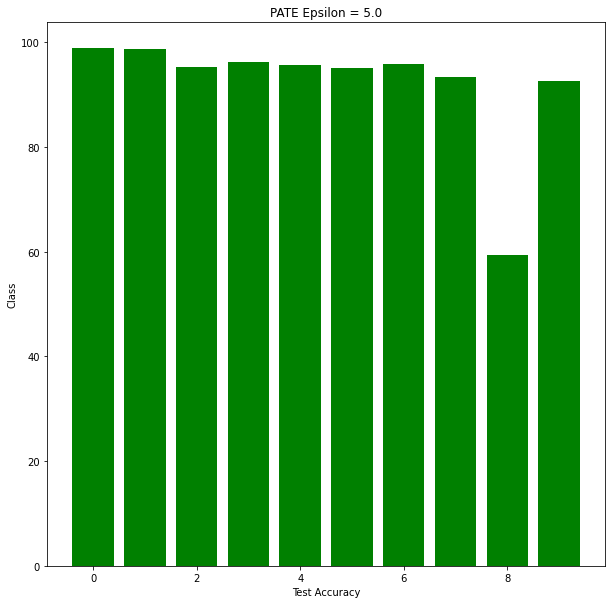

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize = (10,10))
# plt.xlabel('Test Accuracy')
# plt.ylabel('Class')
# plt.title('PATE Epsilon = 15.0')
# plt.bar(classes, class_accuracy, color='green')

# for index, value in enumerate(class_accuracy):
#   plt.text(index, value, str(value)[:5])

# plt.show()

In [ ]:
# ### Class-Wise Accuracy of the predictions on the base model

# from sklearn.metrics import confusion_matrix

# conf_mat=confusion_matrix(np.concatenate(targets_1), np.concatenate(predict_1))
# print(conf_mat)
# class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)
# print(class_accuracy)

[[792   0   3   0   0   1   2   2   1   0]
 [  0 885   4   1   0   2   3   0   0   1]
 [ 10   0 768   3   6   2   6   8   1   2]
 [  1   0  12 761   0   8   0   7   0   2]
 [  1   3   2   0 738   0  11   2   2  13]
 [  6   1   1  19   2 679   6   0   0   0]
 [  8   2   2   0   9  12 749   0   0   0]
 [  0   8  28   2   2   0   0 783   1  14]
 [  2   3   0   4   0  12   0   2  41   5]
 [ 11   5   7  12  13   5   0   6   0 742]]
[98.87640449 98.77232143 95.2853598  96.20733249 95.59585492 95.09803922
 95.78005115 93.43675418 59.42028986 92.63420724]


In [ ]:
# classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

<BarContainer object of 10 artists>

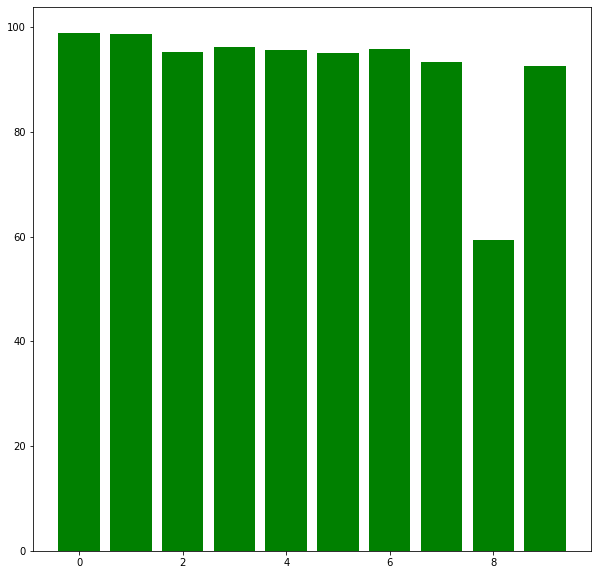

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize = (10,10))

# plt.bar(classes,class_accuracy, color='green')